In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=726ff71175285a7ce9d22c18eb04d8f36a530f34c95417ebf102f0b26cefe64f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [36]:
import ta
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from ta.momentum import RSIIndicator
from ta.trend import MACD


In [25]:
df = pd.read_csv("/content/63MOONS.BO.csv")
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4938 non-null   object 
 1   Open       4938 non-null   float64
 2   High       4938 non-null   float64
 3   Low        4938 non-null   float64
 4   Close      4938 non-null   float64
 5   Adj Close  4938 non-null   float64
 6   Volume     4938 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.2+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4938 non-null   datetime64[ns]
 1   open       4938 non-null   float64       
 2   high       4938 non-null   float64       
 3   low        4938 non-null   float64       
 4   close      4938 non-null   float64       
 5   adj_close  4938 non-null   float64       
 6   volume     4938 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 270.2 KB


,date,open,high,low,close,adj_close,volume
0,2000-01-03,124.250000,124.250000,124.250000,124.250000,90.421135,26400
1,2000-01-04,133.199997,134.149994,115.000000,134.149994,97.625725,56600
2,2000-01-05,123.449997,135.000000,123.449997,129.100006,93.950676,57600
3,2000-01-06,133.000000,139.399994,118.900002,119.800003,87.182724,29100
4,2000-01-07,110.250000,110.250000,110.250000,110.250000,80.232864,6100


In [27]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [28]:
df.drop_duplicates(inplace=True)
df.shape

(4938, 7)

In [29]:
df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
adj_close,float64
volume,int64


In [30]:
df['close_lag1']=df['close'].shift(1) #close price one day before
df['close_lag2']=df['close'].shift(2) #close price two days before
df['close_lag3']=df['close'].shift(3) #close price three days before
df['close_lag4']=df['close'].shift(4) #close price four days before
df['close_lag5']=df['close'].shift(5) #close price five days before
df['volume_lag1']=df['volume'].shift(1)
df['volume_lag2']=df['volume'].shift(2)
df['ma_5']=df['close'].rolling(5).mean()
df['ma_10']=df['close'].rolling(10).mean()
df['ma_20']=df['close'].rolling(20).mean()
df['ma_50']=df['close'].rolling(50).mean()
df['rsi']=RSIIndicator(df['close']).rsi()
df['macd']=MACD(df['close']).macd()


In [31]:
df.dropna(inplace=True)

In [32]:
X=df[['open','high','low','close_lag1','close_lag2','close_lag3','close_lag4','close_lag5','volume_lag1','volume_lag2','ma_5','ma_10','ma_20','ma_50','rsi','macd']]
Y=df['close']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
r2_score=r2_score(y_test,y_pred)
print("R2 Score:",r2_score)
print("Mean Squared Error:", mse)

Root Mean Squared Error: 1.8045758549336466
Mean Absolute Error: 1.1480142451405282
R2 Score: 0.9931503837753771
Mean Squared Error: 3.2564940162095017


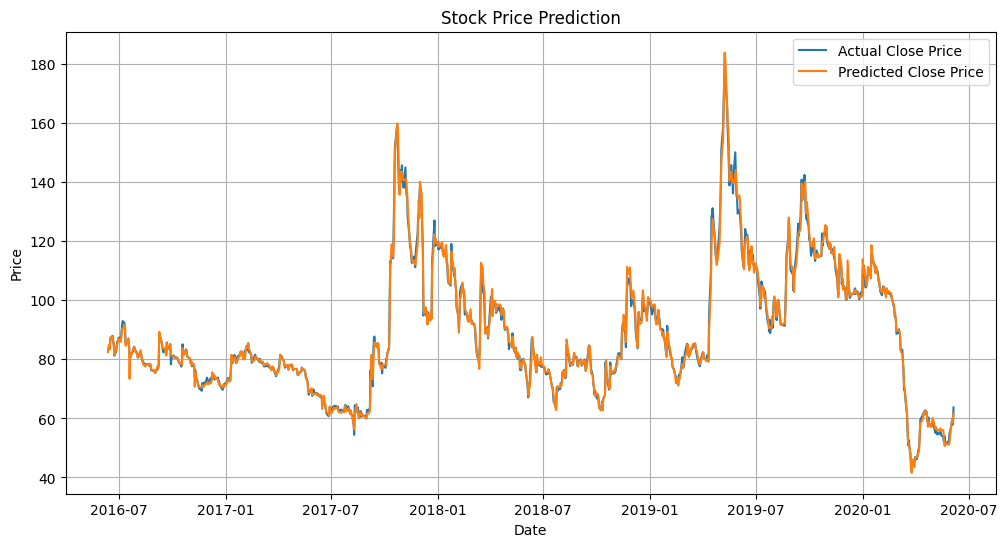

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df.loc[y_test.index, 'date'], y_test.values, label='Actual Close Price')
plt.plot(df.loc[y_test.index, 'date'], y_pred, label='Predicted Close Price')
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
df.loc[y_test.index, 'predicted_price'] = y_pred


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)
columns_to_show = ['date', 'open', 'high', 'low', 'close', 'volume',
                   'predicted_price']
print(df.loc[:, columns_to_show])

           date         open         high          low        close   volume  predicted_price
49   2000-03-13   381.200012   381.200012   324.799988   324.799988    57500              NaN
50   2000-03-14   324.799988   347.799988   298.850006   322.700012    63700              NaN
51   2000-03-15   298.000000   320.000000   296.899994   305.649994    51100              NaN
52   2000-03-16   290.000000   296.000000   281.200012   281.200012    23900              NaN
53   2000-03-21   260.049988   268.000000   258.750000   259.750000    15600              NaN
54   2000-03-22   242.000000   280.500000   239.000000   254.149994    36500              NaN
55   2000-03-23   235.000000   261.950012   233.850006   233.850006    12500              NaN
56   2000-03-24   216.250000   230.000000   215.149994   215.800003    32800              NaN
57   2000-03-27   225.000000   233.050003   225.000000   233.050003     5300              NaN
58   2000-03-28   250.399994   251.649994   250.399994   251

In [53]:
mean_pred=df['predicted_price'].mean()
mean_close=df['close'].mean()
max_close=df['close'].max()
min_close=df['close'].min()
print("Max Close Price:",max_close)
print("Min Close Price:",min_close)
print("Mean Close Price:",mean_close)
print("Mean Predicted Price:",mean_pred)


Max Close Price: 3016.5
Min Close Price: 7.5
Mean Close Price: 584.4472899311133
Mean Predicted Price: 89.09313794118495
